In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
# Load and inspect data
df = pd.read_csv("C:/Users/VENKAT VALETI/Downloads/export_1733599585888.csv")
print(df.head())
print(df.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2     01-01-2024 00:57      01-01-2024 01:17                1   
1         1     01-01-2024 00:03      01-01-2024 00:09                1   
2         1     01-01-2024 00:17      01-01-2024 00:35                1   
3         1     01-01-2024 00:36      01-01-2024 00:44                1   
4         1     01-01-2024 00:46      01-01-2024 00:52                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72           1                  N           186            79   
1           1.80           1                  N           140           236   
2           4.70           1                  N           236            79   
3           1.40           1                  N            79           211   
4           0.80           1                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [3]:
# Rename columns for readability
df.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

In [4]:
# Parse datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

In [5]:
# Check if there are any missing values in the dataset
any_missing = df.isnull().values.any()
print(f"Any missing values: {any_missing}")

Any missing values: True


In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

pickup_datetime      9487
dropoff_datetime    10611
dtype: int64


In [7]:
missing_pickup = (9487 / len(df)) * 100
missing_dropoff = (10611 / len(df)) * 100
print(f"Pickup datetime missing: {missing_pickup:.2f}%")
print(f"Dropoff datetime missing: {missing_dropoff:.2f}%")

Pickup datetime missing: 0.90%
Dropoff datetime missing: 1.01%


In [8]:
# Filling missing datetime values with the median of each column
df['pickup_datetime'].fillna(df['pickup_datetime'].median(), inplace=True)
df['dropoff_datetime'].fillna(df['dropoff_datetime'].median(), inplace=True)

C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_7596\3894223761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pickup_datetime'].fillna(df['pickup_datetime'].median(), inplace=True)
C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_7596\3894223761.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

Series([], dtype: int64)


In [10]:
any_missing = df.isnull().values.any()
print(f"Any missing values: {any_missing}")

Any missing values: False


In [11]:
duplicates = df[df.duplicated()]
print(duplicates)


         VendorID     pickup_datetime    dropoff_datetime  passenger_count  \
76995           1 2024-02-01 08:25:00 2024-02-01 08:25:00                1   
90196           1 2024-02-01 11:25:00 2024-02-01 11:25:00                1   
102437          1 2024-02-01 14:43:00 2024-02-01 14:43:00                1   
152319          1 2024-03-01 08:46:00 2024-03-01 08:46:00                1   
177090          2 2024-03-01 13:54:00 2024-03-01 14:03:00                2   
177572          1 2024-03-01 14:11:00 2024-03-01 14:11:00                2   
198173          2 2024-03-01 17:25:00 2024-03-01 17:34:00                1   
226291          2 2024-04-01 02:59:00 2024-04-01 02:59:00                1   
244080          1 2024-04-01 11:14:00 2024-04-01 11:14:00                1   
244081          1 2024-04-01 11:14:00 2024-04-01 11:14:00                1   
253988          1 2024-04-01 13:34:00 2024-04-01 13:34:00                2   
271313          1 2024-04-01 15:23:00 2024-04-01 15:23:00       

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
# Identify columns with numerical data
numerical_columns = df.select_dtypes(include=['number']).columns

# Check for negative values in each numerical column
negative_values = df[numerical_columns] < 0

# Sum of negative values per column
negative_count_per_column = negative_values.sum()

print("Number of negative values in each numerical column:")
print(negative_count_per_column)

# Optional: Rows containing negative values
rows_with_negatives = df[negative_values.any(axis=1)]
print("\nRows with negative values:")
print(rows_with_negatives)

Number of negative values in each numerical column:
VendorID                     0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount              13714
extra                     7102
mta_tax                  13346
tip_amount                  48
tolls_amount               866
improvement_surcharge    13755
total_amount             13755
congestion_surcharge     11148
Airport_fee               1941
dtype: int64

Rows with negative values:
         VendorID     pickup_datetime    dropoff_datetime  passenger_count  \
99              2 2024-01-01 00:18:00 2024-01-01 00:30:00                1   
506             2 2024-01-01 00:04:00 2024-01-01 00:04:00                1   
536             2 2024-01-01 00:41:00 2024-01-01 00:46:00                1   
552             2 2024-01-01 00:42:00 2024-01-01 01:14:00                1   
682             2 202

In [12]:
# Feature engineering (already done)
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Define target variable based on hypothesis
df['is_peak_demand'] = (
    ((df['pickup_hour'].between(7, 9)) & (df['is_weekend'] == 0)) | 
    ((df['pickup_hour'].between(17, 19)) & (df['is_weekend'] == 0)) |
    ((df['pickup_hour'].between(20, 23)) & (df['weekday'].isin([4, 5])))
).astype(int)

# Select features and target
X = df[['pickup_hour', 'weekday', 'is_weekend']]
y = df['is_peak_demand']

In [14]:
# Total number of rows in the dataset
total_rows = len(df)

# Number of rows with negative values in each numerical column
negative_rows_count = (df[numerical_columns] < 0).any(axis=1).sum()

# Percentage of rows with negative values
negative_percentage = (negative_rows_count / total_rows) * 100

# Print results
print(f"Total rows: {total_rows}")
print(f"Rows with negative values: {negative_rows_count}")
print(f"Percentage of rows with negative values: {negative_percentage:.2f}%")


Total rows: 1048525
Rows with negative values: 13757
Percentage of rows with negative values: 1.31%


In [15]:
# Check for negative values in specific columns
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge']

# Identify rows with negative values in any of the columns
negative_values = df[df[columns_to_check].lt(0).any(axis=1)]

# Display the rows with negative values
print(negative_values)

# Decide whether to drop or handle the negative values
# Example: Drop rows with negative fare or total amounts
df_cleaned = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0)]


         VendorID     pickup_datetime    dropoff_datetime  passenger_count  \
99              2 2024-01-01 00:18:00 2024-01-01 00:30:00                1   
506             2 2024-01-01 00:04:00 2024-01-01 00:04:00                1   
536             2 2024-01-01 00:41:00 2024-01-01 00:46:00                1   
552             2 2024-01-01 00:42:00 2024-01-01 01:14:00                1   
682             2 2024-01-01 00:24:00 2024-01-01 01:10:00                1   
...           ...                 ...                 ...              ...   
1048330         2 2024-07-01 00:44:00 2024-07-01 00:48:00                1   
1048437         2 2024-07-01 00:44:00 2024-07-01 00:48:00                1   
1048478         2 2024-07-01 00:44:00 2024-07-01 00:48:00                1   
1048505         2 2024-07-01 00:44:00 2024-07-01 00:48:00                1   
1048527         2 2024-07-01 00:44:00 2024-07-01 00:48:00                1   

         trip_distance  RatecodeID store_and_fwd_flag  PULocati

In [13]:
# One-hot encode the weekday feature for linear regression
encoder = ColumnTransformer(
    transformers=[
        ('weekday', OneHotEncoder(handle_unknown='ignore'), ['weekday'])
    ],
    remainder='passthrough'
)

X_encoded = encoder.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = lr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.1701
R-squared: 0.1631


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84    225279
           1       0.61      0.25      0.35     89294

    accuracy                           0.74    314573
   macro avg       0.69      0.59      0.60    314573
weighted avg       0.72      0.74      0.70    314573



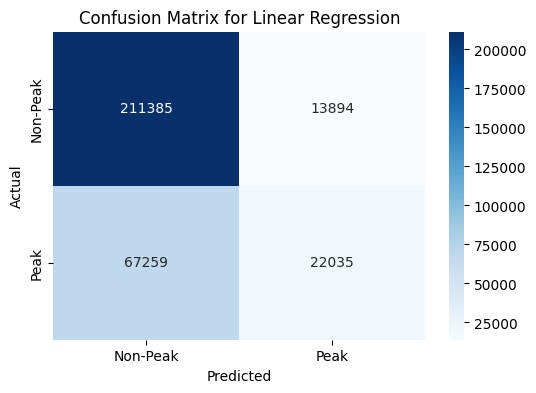

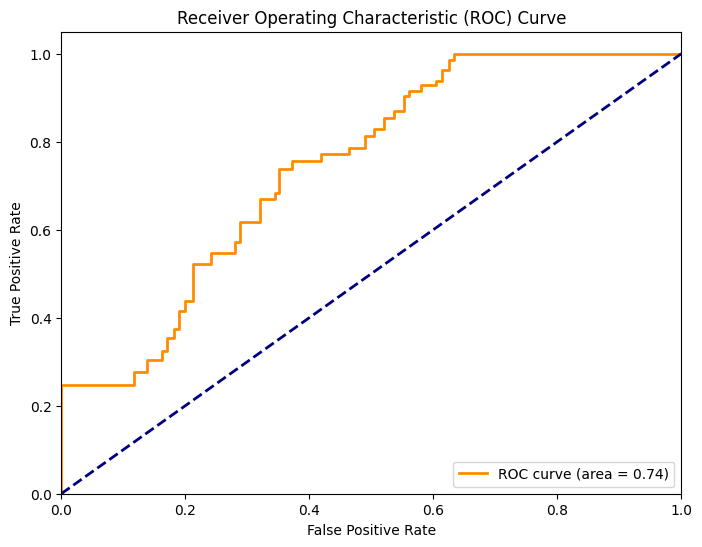

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Convert predictions to binary values (threshold = 0.5 for classification)
y_pred_class = (y_pred >= 0.5).astype(int)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Peak', 'Peak'], yticklabels=['Non-Peak', 'Peak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Linear Regression')
plt.show()

# ROC Curve and AUC
y_pred_prob = lr.predict(X_test)  # Predicted probabilities from linear regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
# Inspect the pickup location IDs or create categories
print(df['PULocationID'].value_counts().head())  # Top locations

PULocationID
132    62088
161    50493
237    48796
236    47161
142    39224
Name: count, dtype: int64


In [19]:
# Define location categories based on PULocationID
location_mapping = {
    132: 'Airport',
    161: 'Business District',
    237: 'Train Station',
    236: 'Business District',
    142: 'Airport'
}

# Map PULocationID to categories and fill missing values as 'Other'
df['location_category'] = df['PULocationID'].map(location_mapping).fillna('Other')

In [20]:
# One-hot encode the location categories
location_encoder = pd.get_dummies(df['location_category'], prefix='location')

# Add encoded location features to the DataFrame
df = pd.concat([df, location_encoder], axis=1)

# Modify the target variable to capture location-based high demand
df['is_peak_demand'] = (
    ((df['pickup_hour'].between(7, 9)) & (df['location_category'] == 'Business District')) | 
    ((df['pickup_hour'].between(17, 19)) & (df['location_category'].isin(['Business District', 'Train Station']))) |
    ((df['pickup_hour'].between(20, 23)) & (df['location_category'] == 'Airport'))
).astype(int)

In [21]:
# Select features for the new hypothesis
X = df[['pickup_hour', 'weekday', 'is_weekend'] + list(location_encoder.columns)]
y = df['is_peak_demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.0456
R-squared: 0.2635


In [23]:
# Convert predictions to binary values (threshold = 0.5 for classification)
y_pred_class = (y_pred >= 0.5).astype(int)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Classification Report:


c:\Users\VENKAT VALETI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VENKAT VALETI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97    293723
           1       0.00      0.00      0.00     20850

    accuracy                           0.93    314573
   macro avg       0.47      0.50      0.48    314573
weighted avg       0.87      0.93      0.90    314573



c:\Users\VENKAT VALETI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


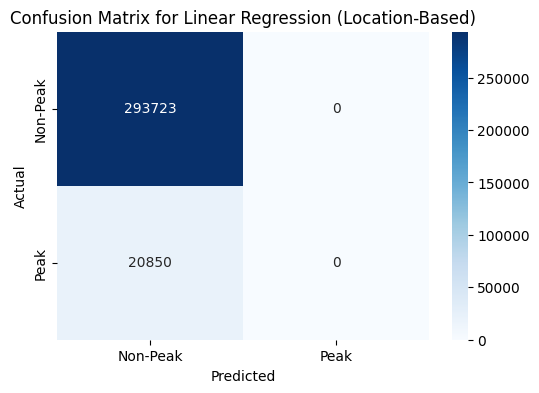

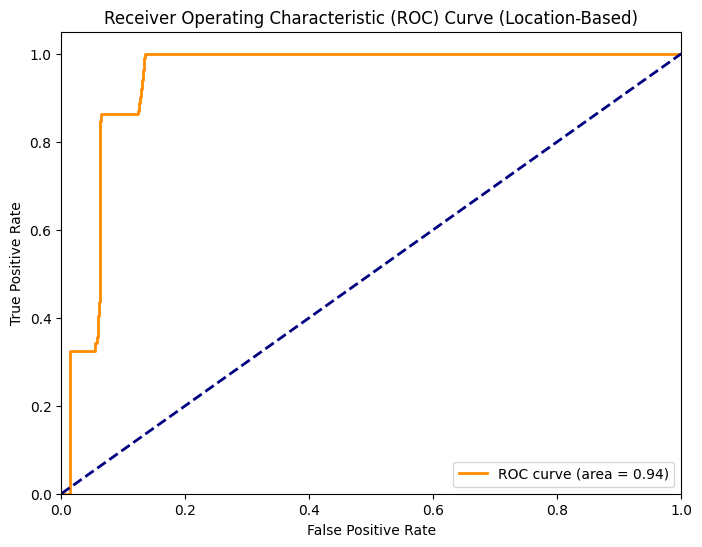

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Peak', 'Peak'], yticklabels=['Non-Peak', 'Peak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Linear Regression (Location-Based)')
plt.show()

# ROC Curve and AUC
y_pred_prob = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Location-Based)')
plt.legend(loc="lower right")
plt.show()

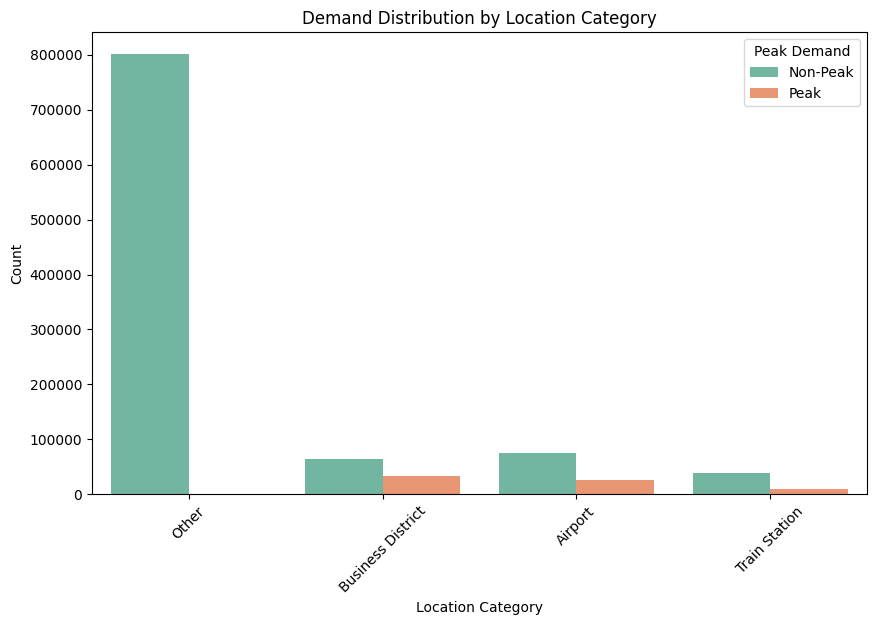

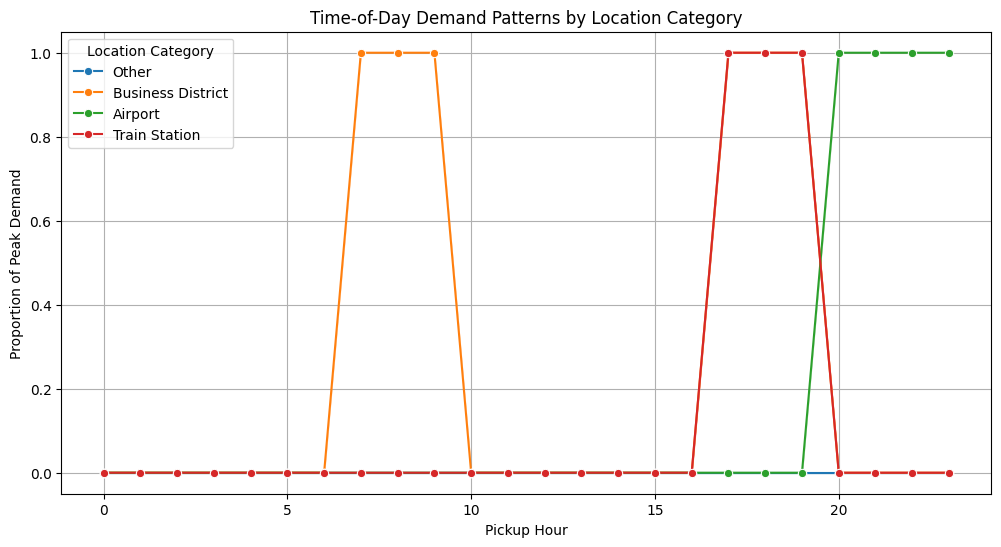

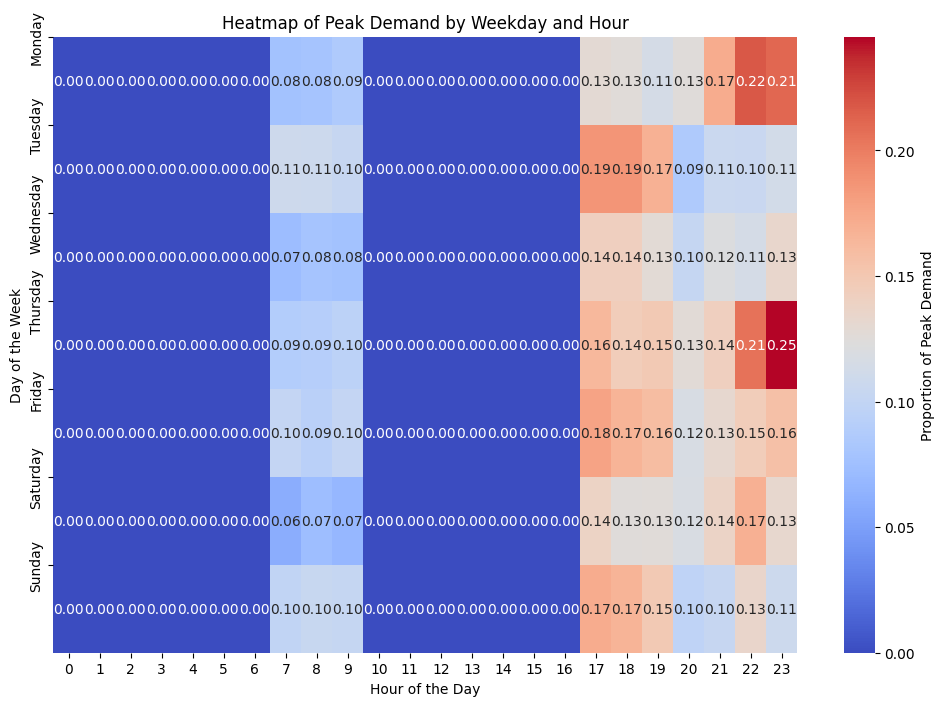

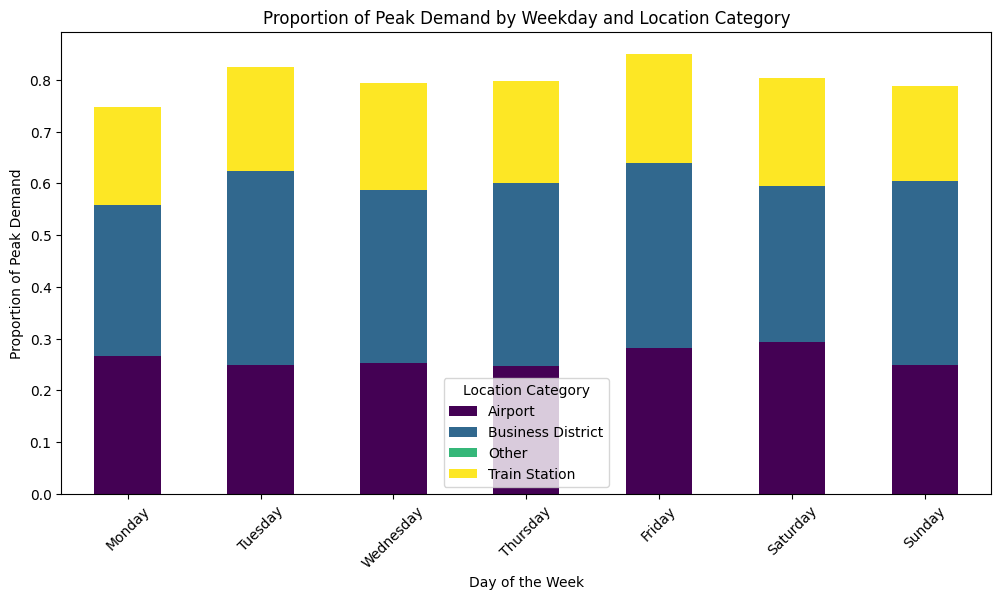

In [25]:
# Visualization: Demand distribution by location category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='location_category', hue='is_peak_demand', palette='Set2')
plt.title('Demand Distribution by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Count')
plt.legend(title='Peak Demand', labels=['Non-Peak', 'Peak'])
plt.xticks(rotation=45)
plt.show()

# Visualization: Time-of-Day demand patterns by location category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='pickup_hour', y='is_peak_demand', hue='location_category', marker='o')
plt.title('Time-of-Day Demand Patterns by Location Category')
plt.xlabel('Pickup Hour')
plt.ylabel('Proportion of Peak Demand')
plt.legend(title='Location Category')
plt.grid(True)
plt.show()

# Visualization: Heatmap of peak demand by weekday and hour
heatmap_data = df.pivot_table(
    index='weekday', columns='pickup_hour', values='is_peak_demand', aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Proportion of Peak Demand'})
plt.title('Heatmap of Peak Demand by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5, 6], 
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.show()

# Visualization: Stacked bar chart for weekday peak demand by location category
weekday_peak_demand = df.groupby(['weekday', 'location_category'])['is_peak_demand'].mean().unstack()

weekday_peak_demand.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Proportion of Peak Demand by Weekday and Location Category')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Peak Demand')
plt.xticks(
    ticks=range(7), 
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    rotation=45
)
plt.legend(title='Location Category')
plt.show()


C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_3396\3874589485.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


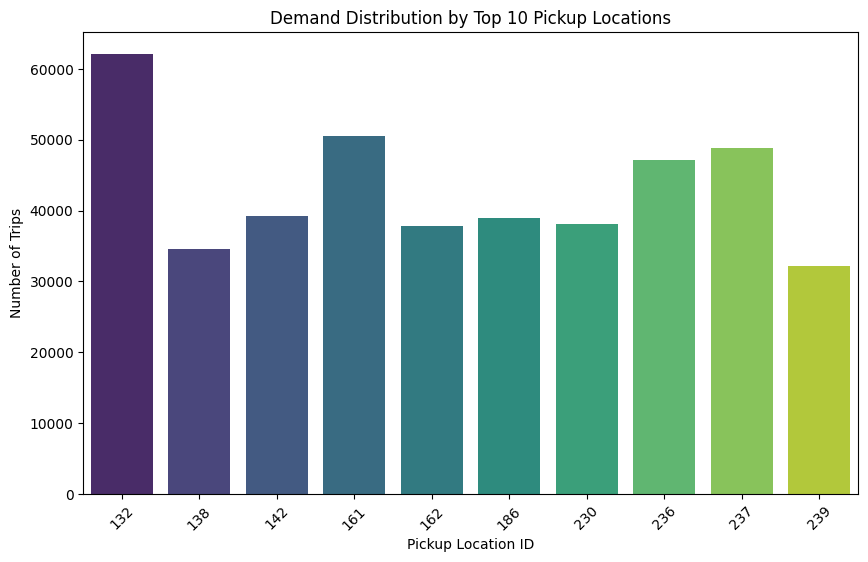

<Figure size 1200x600 with 0 Axes>

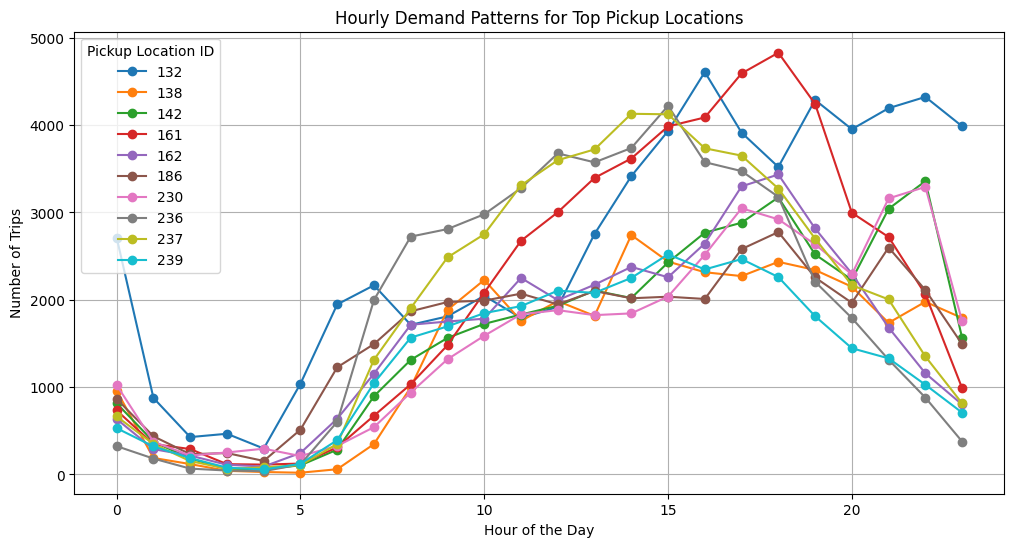

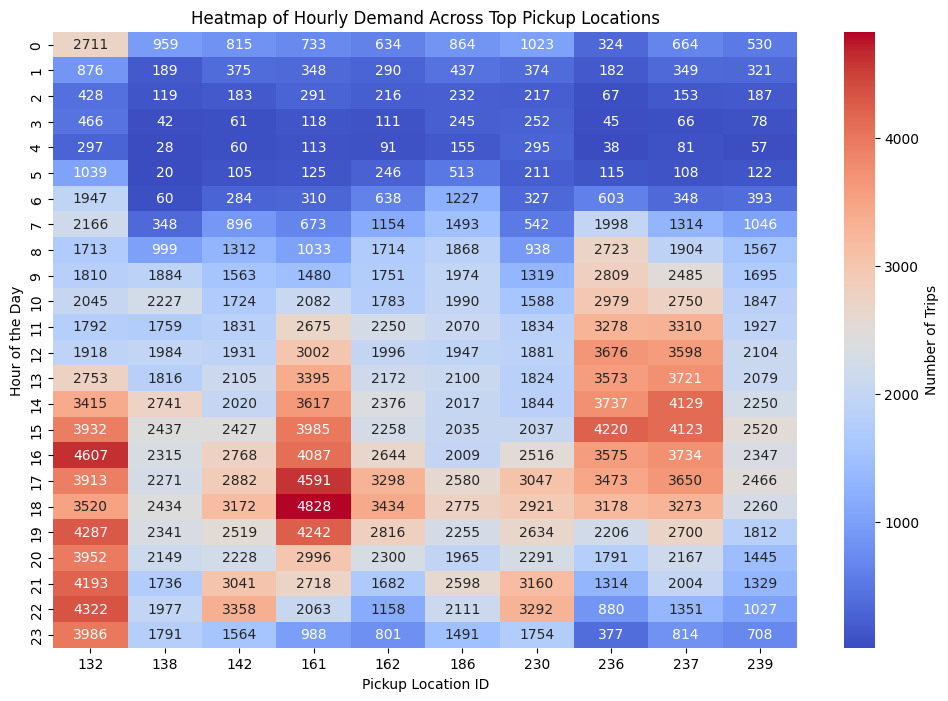

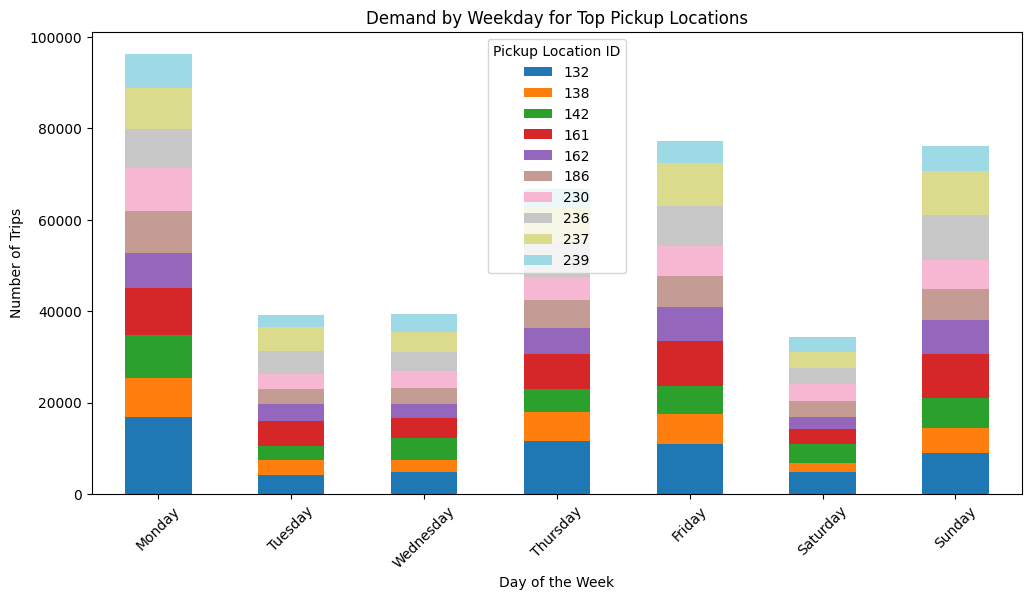

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime columns to proper datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday

# Visualization 1: Demand Distribution by Pickup Location (Top 10 Locations)
top_locations = df['PULocationID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
plt.title('Demand Distribution by Top 10 Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Hourly Demand Patterns for Top Locations
top_location_ids = top_locations.index
hourly_data = df[df['PULocationID'].isin(top_location_ids)].groupby(['pickup_hour', 'PULocationID']).size().unstack()

plt.figure(figsize=(12, 6))
hourly_data.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
plt.title('Hourly Demand Patterns for Top Pickup Locations')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Pickup Location ID')
plt.grid()
plt.show()

# Visualization 3: Heatmap of Hourly Demand Across Pickup Locations
heatmap_data = df[df['PULocationID'].isin(top_location_ids)].pivot_table(
    index='pickup_hour', columns='PULocationID', values='VendorID', aggfunc='count'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Number of Trips'})
plt.title('Heatmap of Hourly Demand Across Top Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Hour of the Day')
plt.show()

# Visualization 4: Demand by Weekday for Top Pickup Locations
weekday_data = df[df['PULocationID'].isin(top_location_ids)].groupby(['weekday', 'PULocationID']).size().unstack()

weekday_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Demand by Weekday for Top Pickup Locations')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(
    ticks=range(7), 
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    rotation=45
)
plt.legend(title='Pickup Location ID')
plt.show()


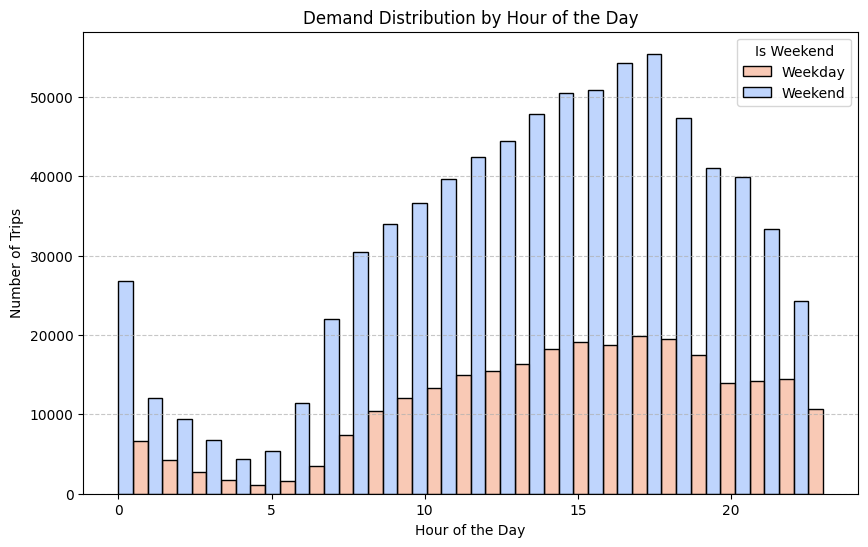

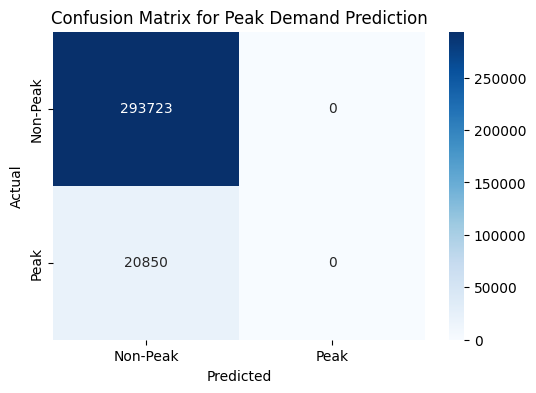

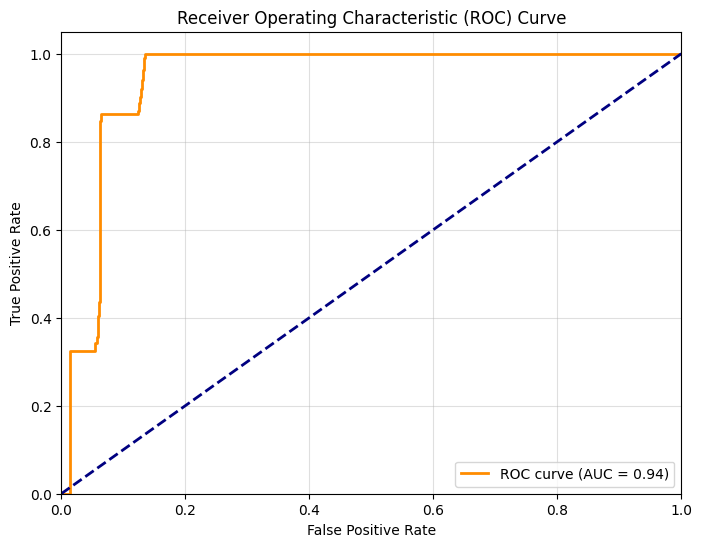

In [28]:
# Demand distribution by hour of the day (weekday vs weekend)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pickup_hour', hue='is_weekend', multiple='dodge', bins=24, palette='coolwarm', kde=False)
plt.title('Demand Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Peak', 'Peak'], yticklabels=['Non-Peak', 'Peak'])
plt.title('Confusion Matrix for Peak Demand Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()
